# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 2. Importing dataset

In [2]:
df = pd.read_csv(r'C:\Users\Josepa Cusidó\EU_Drugs_Wastewater\02 Data\Wastewater drug residues_CLEAN.csv', index_col = False)

In [3]:
df.shape

(2316, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2316 non-null   int64  
 1   year          2316 non-null   int64  
 2   metabolite    2316 non-null   object 
 3   SiteID        2316 non-null   object 
 4   country       2316 non-null   object 
 5   city          2316 non-null   object 
 6   Wednesday     2316 non-null   float64
 7   Thursday      2316 non-null   float64
 8   Friday        2316 non-null   float64
 9   Saturday      2316 non-null   float64
 10  Sunday        2316 non-null   float64
 11  Monday        2316 non-null   float64
 12  Tuesday       2316 non-null   float64
 13  Weekday mean  2316 non-null   float64
 14  Weekend mean  2316 non-null   float64
 15  Daily mean    2316 non-null   float64
dtypes: float64(10), int64(2), object(4)
memory usage: 289.6+ KB


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.dtypes

year              int64
metabolite       object
SiteID           object
country          object
city             object
Wednesday       float64
Thursday        float64
Friday          float64
Saturday        float64
Sunday          float64
Monday          float64
Tuesday         float64
Weekday mean    float64
Weekend mean    float64
Daily mean      float64
dtype: object

In [7]:
df.head()

,year,metabolite,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,2021,amphetamine,AT002,AT,Hall-Wattens,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97
2,2021,amphetamine,AT004,AT,Innsbruck,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02
3,2021,amphetamine,AT005,AT,Kapfenberg,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46
4,2021,amphetamine,AT007,AT,Kufstein,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80


# 3. Picking out variables

In [8]:
# For the purpose of the exercise and my exploratory visual analysis, I will leave out the following variables: SiteID and city.
# Create a subset excluding the "SiteID" and "city" columns
sub = df[['year', 'metabolite', 'country', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Weekday mean', 'Weekend mean', 'Daily mean']]

df.to_csv(os.path.join(path, '02 Data', 'Wastewater drug residues_CLEAN.csv'))

# 4. Correlation matrix

In [9]:
sub

,year,metabolite,country,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2021,amphetamine,AT,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57
1,2021,amphetamine,AT,8.37,7.08,6.88,4.25,6.17,8.25,7.77,7.74,6.39,6.97
2,2021,amphetamine,AT,16.59,16.72,17.60,24.92,29.69,22.38,26.24,19.85,23.65,22.02
3,2021,amphetamine,AT,25.01,24.11,30.52,31.85,36.75,35.58,22.43,23.85,33.68,29.46
4,2021,amphetamine,AT,24.24,16.19,19.70,10.93,22.68,20.69,24.18,21.54,18.50,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2011,methamphetamine,ES,6.43,8.12,9.31,10.50,10.66,6.52,7.46,7.34,9.24,8.43
2312,2011,methamphetamine,GB,7.97,7.22,6.54,8.99,13.72,6.70,6.92,7.37,8.99,8.18
2313,2011,methamphetamine,IT,44.46,41.37,48.55,54.00,63.47,45.44,43.47,43.10,52.86,48.68
2314,2011,methamphetamine,NO,235.00,212.60,231.06,186.16,295.50,302.46,250.71,232.77,253.80,244.79


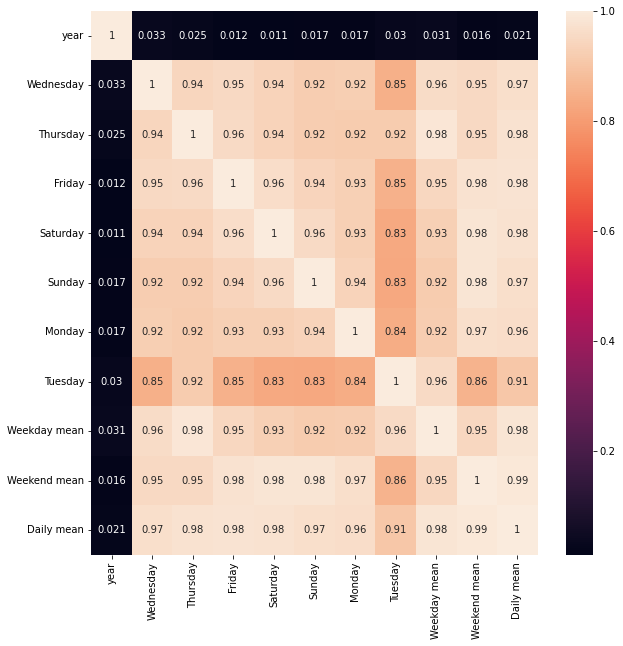

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [11]:
# Comments
# The correlation between the variables is mostly linear, so they show a strong relationship.  

# 5. Scatterplot

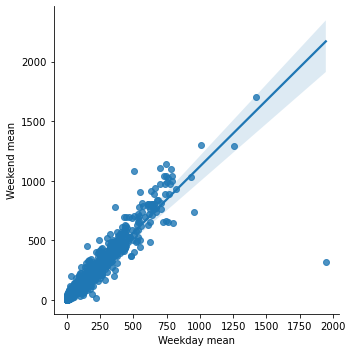

In [12]:
sns.lmplot(x = 'Weekday mean', y = 'Weekend mean', data = df)

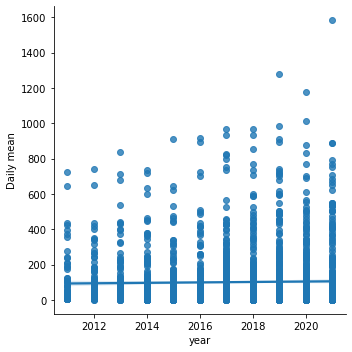

In [13]:
sns.lmplot(x = 'year', y = 'Daily mean', data = df)

In [14]:
# Comments
# Weekend and Weekday mean variables show a linear trend. On the contrary, daily mean and year do not show a linear trend. 

# 6. Pair plot

In [15]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['year', 'Weekday mean', 'Weekend mean', 'Daily mean']]

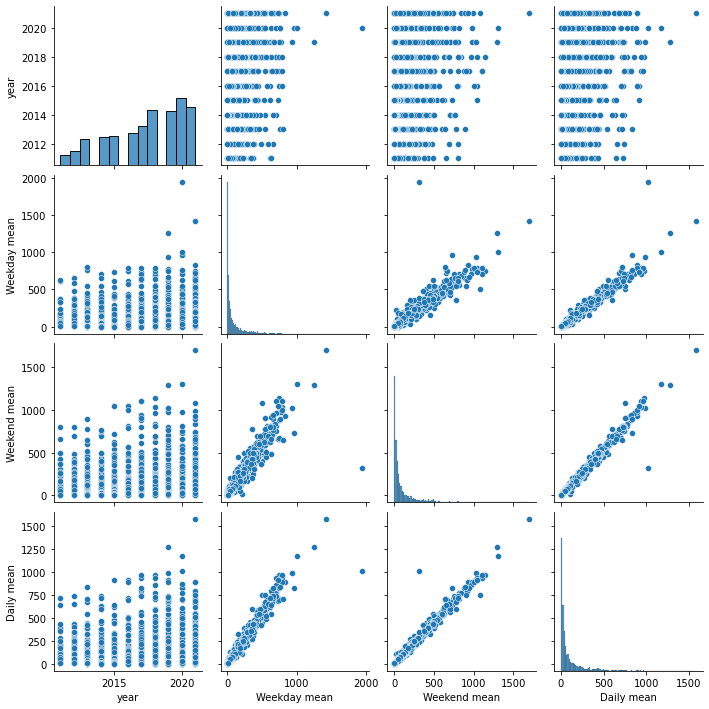

In [16]:
g = sns.pairplot(sub_2)

In [17]:
# Comments
# There is a strong relationship between the variables weekday mean, weekend mean and daily mean.  

# 7. Categorical plot

<AxesSubplot:xlabel='Daily mean', ylabel='Count'>

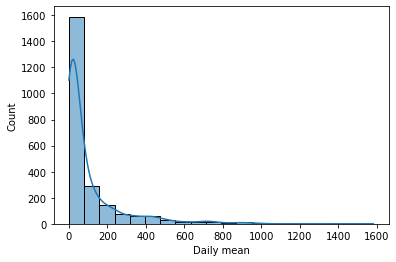

In [18]:
# Use a histogram to visualize the distribution of the variables.  

sns.histplot(df['Daily mean'], bins = 20, kde = True)

In [19]:
df.loc[df['Daily mean'] < 100, 'Daily mean category'] = 'Low mean'

In [20]:
df.loc[(df['Daily mean'] >= 100) & (df['Daily mean'] < 200), 'Daily mean category'] = 'Middle mean'

In [21]:
df.loc[df['Daily mean'] >= 200, 'Daily mean category'] = 'High mean'

In [22]:
df['Daily mean category'].value_counts(dropna = False)

Low mean       1698
High mean       357
Middle mean     261
Name: Daily mean category, dtype: int64

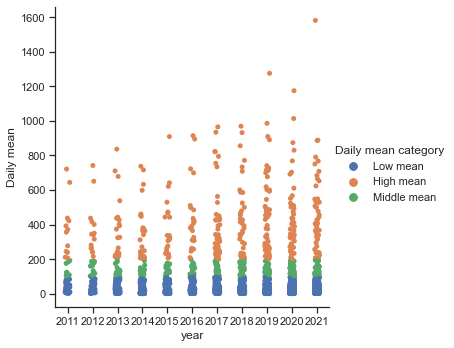

In [23]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="year", y="Daily mean", hue="Daily mean category", data=df)

In [24]:
# Comments
# There has been an increase of the high Daily mean from 2011 to 2021, a turning point was 2016. 

# 8. Exploring Questions & Hypothesis

In [25]:
# Question 
# Which is the most consumed drug in Europe? We still don't have an answer
# When do people consume more drugs? We still don't have an answer
# How has it evolved the consumption of drugs over the years? We still don't have an answer 
# In which countries/cities are drugs more consumed? We still don't have an answer

# Hypothesis
# There is a strong relationship between the weekday mean and weekend mean of drugs found in wastewater.
# There has ben an increase of the high daily mean category since 2016. 